# Metodi Analitici

Abbiamo sempre trattato i metodi computazionali come simulazioni e ricampionamenti ma alcuni problemi che abbiamo risolto hanno soluzioni analitiche che risolvono il problema più velocemente.

Presenteremo alcuni di questi metodi e spiegheremo il loro funzionamento. 

## Distribuzione normale

Come esempio di partenza riprendiamo il problema dei gorilla:

Supponiamo che tu sia uno scienziato che studia i gorilla nella natura. Abbiamo pesato 9 gorilla e abbiamo trovato che la media del peso del campione $\overline{x}$ è di 90 Kg con una deviazione standard di 7.5 Kg. Se usassimo $\overline{x}$  per stimare la media della popolazione quale sarebbe l'errore standard della stima?

Per rispondere a questa domanda, dobbiamo campionale la distribuzione di $\overline{x}$. In passato abbiamo approssimato la distribuzione simulando l'esperimento (i pesi dei 9 gorilla), calcolando $\overline{x}$ per ogni esperimento simulato e accumulando la distribuzione delle stime.

Il risultato è una approssimazione del campione di distribuzione. Poi usiamo il campione di distribuzione per calcolare gli errori standard e gli intervalli di confidenza:

1. La deviazione standard della distribuzione campionaria è lo standard error delle stime, che in questo esempio è circa di 2.5 Kg.

2. L'intervallo tra il 5° e il 95° percentile del campione di distribuzione è il 90% dell'intervallo di confidenza. Se eseguiamo l'esperimento molte volte, ci aspettiamo che le stime cadano in questo intervallo il 90% del tempo. In questo esempio il 90% dell'intervallo di confidenza è di (86,94) Kg.

Ora faremo gli stessi calcoli analiticamente. Partiamo dal fatto che che i pesi delle femmine adulte sono più o meno distribuite normalmente. Le distribuzioni normali hanno due proprietà che le rendono suscettibili per le analisi: sono "chiuse" per le trasformazioni lineare e per le addizioni. (Il risultato è ancora una distribuzione normale).
Per spiegare cosa significhi serve qualche notazione.

Se la distribuzione di una quantità, $X$ è normale con i parametri $\mu$ e $\sigma$ 
$$X \sim \mathcal{N} (\mu, \sigma^{2})$$

Dove il simbolo $\sim$ significa è distribuito e la lettera $\mathcal{N}$ significa normale.
Una trasformazione lineare di $X$ è  $X' = aX + b$ dove $a$ e $b$ sono numeri reali.
Una famiglia di distribuzioni è chiusa sulle trasformazini lineari se $X'$ è nella stessa famiglia di $X$

La distribuzione normale ha questa proprietà se $X \sim \mathcal{N} (\mu, \sigma^{2})$ allora:

$$X' \sim \mathcal{N} (a \mu + b, a^{2} \sigma^2)$$

Le distribuzioni normali sono anche chiuse sulla addizione. Se $Z = X + Y$ con $X \sim \mathcal{N} (\mu_{x}, \sigma^2_{x})$ e $Y \sim \mathcal{N} (\mu_{y}, \sigma^2_{y})$ allora 

$$Z \sim \mathcal{N}(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$$

Nel caso speciale $Z = X + X$

$$Z \sim \mathcal{N}(2\mu_X, 2\sigma_X^2)$$

In generale se calcoliamo $n$ valori di $X$

$$Z \sim \mathcal{N} (n \mu_X, n \sigma_X^2)$$

## Campionare le distribuzioni

Ora abbiamo tutto cò che ci serve per calcolare il campionamento di una distribuzione di $\overline{x}$. Ricorda che abbiamo calcolaro $\overline{x}$ pesando n gorilla e calcolando la loro media. 

Assumiamo che la distribuzione del peso dei gorilla $X$ sia approssimativamente normale:

$$X \sim \mathcal{N} (\mu, \sigma^{2})$$

Se pesiamo n gorilla i pesi Y saranno distribuiti:

$$Y \sim \mathcal{N} (n \mu, n \sigma^{2})$$

Se usiamo l'equazione sopra otteniamo 

$$Z \sim \mathcal{N} (\mu, \sigma^2/n)$$

La distribuzione di di $Z$ è il campionamento di $\overline{x}$. La media di $Z$ è $\mu$, il che mostra che $\overline{x}$ è una stima imparziale di $\mu$. La varianza della distribuzione campionaria è $\sigma^2/n$.

Dunque la deviazione standard della distribuzione campionaria, che rappresenta lo standard error della stima 

$$\frac{\sigma}{\sqrt{n}}$$

Nel nostro esempio $\sigma$ è 7.5Kg con $n$ pari a 9, dunque lo standard error è 2.5Kg.
Il risultato è consistente con quanto stimato dalla simulazione, ma molto più facile da calcolare.

Possiamo usare la distribuzione campionaria per calcolare l'intervallo di confidenza. Un intervallo del 90% di $\overline{x}$ è un intervallo tra il 5° e il 95° percentile di $Z$. Visto che $Z$ è normalmente distribuito possiamo calcolare i percentili valutando l'inverso della funzione CDF.

Non ci sono forme chiuse per il calcolo di CDF della distribuzione normale e della sua funzione inversa ma ci sono metodi numerici veloci e implementati in SciPy mostriamo un esempio:

In [1]:
import scipy.stats


def EvalNormalCdfInverse(p, mu=0, sigma=1):
    return scipy.stats.norm.ppf(p, loc=mu, scale=sigma)

Data una probabilità p viene restituito il percentile della distribuzione normale con i parametri $\mu$ e $\sigma$. L'intervallo di confidenza del 90% di $\overline{x}$ vuole il 5° e il 95° percentile:

In [2]:
EvalNormalCdfInverse(0.05, mu=90, sigma=2.5)

85.88786593262132

In [3]:
EvalNormalCdfInverse(0.95, mu=90, sigma=2.5)

94.11213406737868

Dunque se eseguiamo l'esperimento molte volte, ci aspettiamo che le stime $\overline{x}$ cadano nel range (85, 94) il 90% delle volte, che è consistente con la simulazione.


## Teorema del limite centrale

Come abbiamo visto nella sezione precedente, sommiamo più distribuzioni normali otteniamo una distribuzione normale. Molte altre distribuzioni non hanno questa proprietà 

Ma se aggiungiamo $n$ valori da quasi tutte le distribuzioni, la distribuzione della somma converge alla normale con l'incremento di n.

Più specificamente, se la distribuzione dei valori ha una media $\mu$ e una deviazione standard $\sigma$ la distribuzione della somma è approssimativamente $\mathcal{N} (n \mu, n \sigma^2)$.
Questo risultato è il teorema del limite (CLT). Rappresenta uno dei più potenti strumento di analisi statistica, ma ci sono alcuni avvertimenti:

* I valori devono indipendenti altrimenti il teorema non si applica 
* I valori devono arrivare dalla stessa distribuzione
* I valori devono essere ottenuti da una distribuzione con una media finita e una varianza. Dunque le distribuzioni di Pareto non sono contemplate.

Il teorema del limite centrale spiega il perchè della prevalenza della distribuzione normale in natura.
Molte caratteristiche delle cose viventi sono influenzate da fattori genetici e ambientali che hanno effetti additivi.
Le caratteristiche che si possono misurare come la somma di un gran numero di piccoli effetti tendono ad avere distribuzioni normali.

## Testare il teorema del limite centrale
Per vedere come il teorema del limite centrale lavora, e quando non funziona, proviam alcuni esperimenti.
Proviamo per prima la distribuzione esponenziale:

In [4]:
def MakeExpoSamples(beta=2.0, iters=1000):
    samples = []
    for n in [1, 10, 100]:
        sample = [np.sum(np.random.exponential(beta, n)) for _ in range(iters)]
        samples.append((n, sample))
    return samples

`MakeExpoSamples` genera campioni di comme di valori della distribuzione esponenziale.
Il parametro `beta` serve alla distribuzione mentre `iter` è il numero delle somme da generare.


Ogni volta che chiamiamo la funzione `np.random.exponential` otteniamo una sequenza di `n` valori della distribuzione esponenziale e calcoliamo la somma, `sample` è una lista di queste somme con lunghezza `iters`.

Riassumendo `n` rappresenta il numero degli elementi da sommare mentre `iters` rappresenta il numero delle somme che calcoliamo per visualizzare la distribuzione risultante.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def NormalProbability(ys):
    n = len(ys)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    ys = np.array(ys)
    ys.sort()
    
    return xs, ys



def Var(xs, mu=None, ddof=0):
    xs = np.asarray(xs)

    if mu is None:
        mu = xs.mean()

    ds = xs - mu
    return np.dot(ds, ds) / (len(xs) - ddof)


def MeanVar(xs, ddof=0):   
    xs = np.asarray(xs)
    mean = xs.mean()
    s2 = Var(xs, mean, ddof)
    return mean, s2


def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys


def NormalProbabilityPlot(axs,sample, fit_color='0.8'):
    xs, ys = NormalProbability(sample)
    mean, var = MeanVar(sample)
    std = math.sqrt(var)
    
    fit = FitLine(xs, mean, std)
    axs.plot(*fit, color=fit_color, label='model')
    axs.plot(xs, ys)
    
    
def NormalPlotSamples(samples, plot=1, ylabel=''):
    
    fig, axs = plt.subplots(1, len(samples),figsize=(10,7))
    fig.tight_layout()
    index = 0
    for n, sample in samples:
        NormalProbabilityPlot(axs[index],sample)
        axs[index].set_title('n=%d' % n)
        index += 1

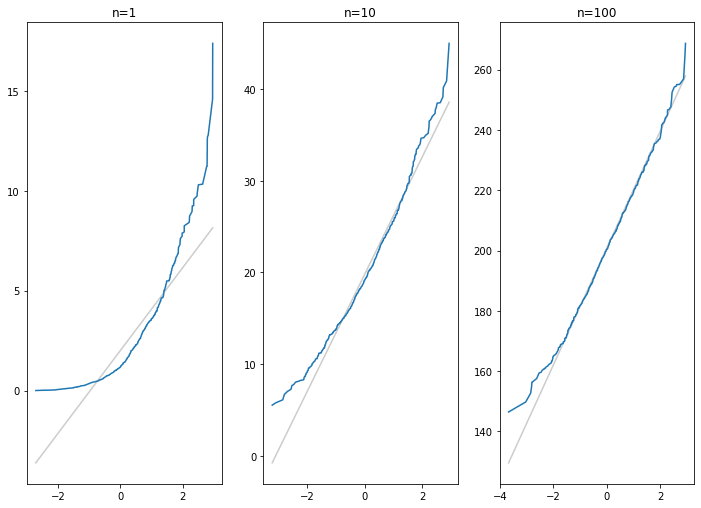

In [6]:
samples = MakeExpoSamples()
NormalPlotSamples(samples)

Con n=1 la distribuzione dei valori resta esponenziale, il grafico della probabilità normale non è una linea.
Ma con n=10 la distribuzione delle somme è approssimativamente normale e se passiamo a n=100 la distribuzione è praticamente indistinguibile dalla normale.

Proviamo a fare lo stesso con la distribuzione lognormal

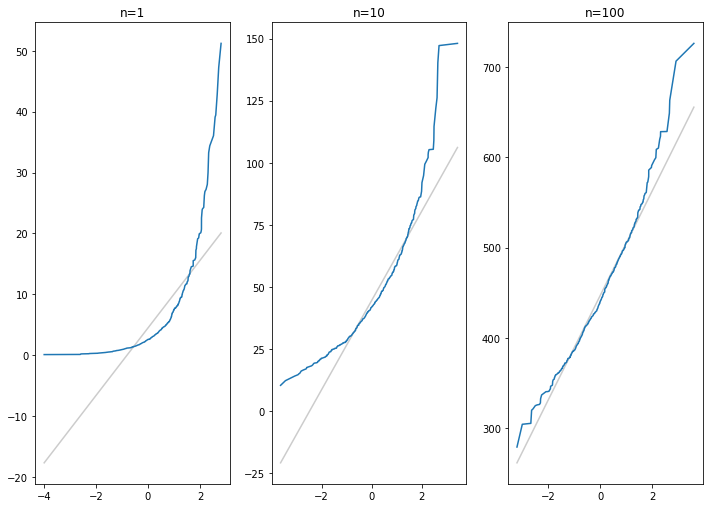

In [7]:
def MakeLognormalSamples(mu=1.0, sigma=1.0, iters=1000):
    samples = []
    for n in [1, 10, 100]:
        sample = [np.sum(np.random.lognormal(mu, sigma, n)) for _ in range(iters)]
        samples.append((n, sample))
    return samples

samples = MakeLognormalSamples()
NormalPlotSamples(samples)

Come ultimo esempio proviamo a visualizzare la distribuzione di Pareto, molte distribuzioni non hanno una media e varianza finita. Come risultato il teorema del limite centrale non si applica 

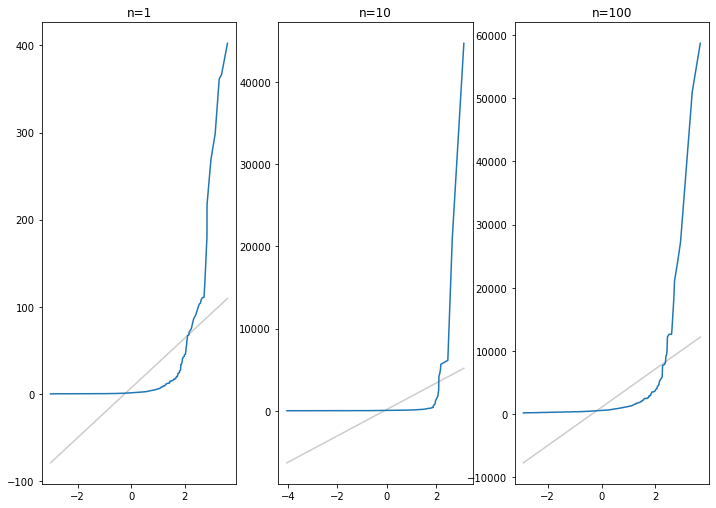

In [8]:
def MakeParetoSamples(alpha=1.0, iters=1000):
    samples = []

    for n in [1, 10, 100]:
        sample = [np.sum(np.random.pareto(alpha, n)) for _ in range(iters)]
        samples.append((n, sample))
    return samples


samples = MakeParetoSamples()
NormalPlotSamples(samples)

## Applicare il teorema del limite centrale

Per vedere come il teorema del limite centrale è utile torniamo all'esempio delle gravidanze, abbiamo visto che la differenza tra la gravidanza del primo figlio e gli altri è di circa 0.078 settimane.

In [9]:
from utils import readReadFemPreg

preg = readReadFemPreg()
live = preg[preg.outcome == 1]

firsts = live[live.birthord == 1]
others = live[live.birthord > 1]

delta = firsts.prglngth.mean() - others.prglngth.mean()
print(delta)

0.07803726677754952


Ricordiamo la logica del test delle ipotesi: calcoliamo il p-value (la probabilità della differenza osservata sotto l'ipotesi nulla) se questo valore è piccolo possiamo concludere che è improbabile che questo valore sia dovuto al caso.
In questo esempio l'ipotesi nulla è che la distribuzione della lunghezza delle gravidanze è la stessa tra il primo figlio e gli altri. Possiamo calcolare la distribuzione campionaria della media in questo modo:

In [10]:
def SamplingDistMean(data, n):
    mean, var = data.mean(), data.var()
    
    mean = n * mean
    var = n * var
    
    mean = mean / n
    var = var / (n ** 2)
    
    return mean,var

In [11]:
dist1 = SamplingDistMean(live.prglngth, len(firsts))
dist2 = SamplingDistMean(live.prglngth, len(others))

In questo esempio i dati non sono normalmente distribuiti, dunque questa approssimazione non è buona.
Ma se calcoliamo la media campioniara degli n valori questa sara una distribuzione normale anche se la distribuzione di partenza non lo è.

calcolia la differenza tra le due distribuzioni

In [12]:
mean1,var1 = dist1
mean2,var2 = dist2

mean = mean1 - mean2
var = var1 + var2

print("Mean {0:.4f} Var {1:.4f}".format(mean,var))

Mean 0.0000 Var 0.0032


La media è 0 che ha un senso in quanto ci aspettiamo che due campioni della stessa distribuzione abbiano la stessa media, la varianza della distribuzione è 0.0032.

Calcoliamo la probabilità di una differenza grande quanto la differenza sotto l'ipotesi nulla.

In [13]:
from scipy import stats

left = 1 - stats.norm.cdf(delta, loc=mean, scale=math.sqrt(var))

In [14]:
right = stats.norm.cdf(-delta, loc=mean, scale=math.sqrt(var))

print(left + right)

0.16754140851087657


il valore è coerente con quanto ottenuto nell'esperimento precendente

## Test di correlazione

Nelle lezioni precedenti abbiamo usato un test di permutazione per testare la correlazione tra il peso dei bambini e l'età della madre, abbiamo che la relazione è statisticamente significante con un p-value minore di 0.001.
Possiamo fare lo stesso analiticamente. Il metodo è basato su questo risultato matematico:
dato due variabili normalmente distribuite non correlate, se generiamo un campione con dimensione n, calcoloamo la correlazione di pearson r e poi calcoliamo la correlazione trasformata:
$$
t = r \sqrt{\frac{n-2}{1-r^2}}
$$

La distribuzione di $t$ è una Student con parametro n - 2. Questa distribuzione è di tipo analitico con con un CDF facilmente calcolabile usando le funzioni gamma.
Possiamo usare il risultato per calcolare la distribuzione campionaria della correlazione sotto l'ipotesi nulla.
Se generiamo sequenze di valori normali quale sarà la distribuzione della loro correlazione?
La funzione `StudentCdf` prende un campione di dimensione `n` e ritorna la distribuzione campionaria della correlazione.

In [15]:
from utils import calcCdf

def StudentCdf(n):
    ts = np.linspace(-3, 3, 101)
    ps = scipy.stats.t.cdf(ts, df=n-2)
    rs = ts / np.sqrt(n - 2 + ts**2)
    unique, _, cdf = calcCdf(rs)
    
    return unique,cdf

`ts` rappresenta un array Numpy di valori per t, la correllazione trasformata.
`ps` contiene le corrisponenti probabiltà, calcolate usando il CDF dalla tdistribuzione implementate in Scipy.
